(60000, 28, 28) (60000, 10) (10000, 28, 28) (10000, 10)


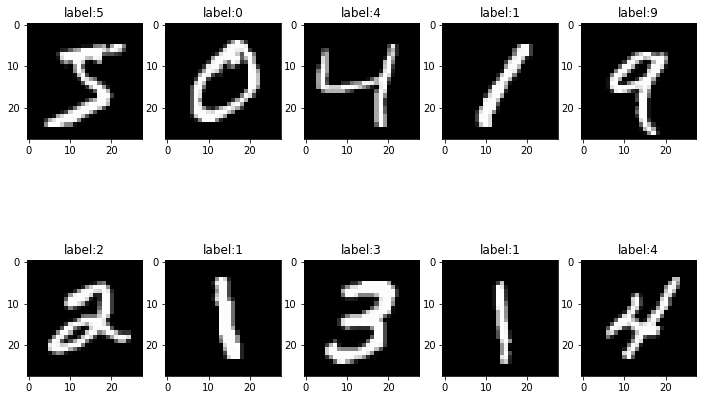

In [24]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import numpy as np
%matplotlib inline

(x_train, y_train), (x_valid, y_valid) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28) / 255
y_train = to_categorical(y_train)  # onehot编码
x_valid = x_valid.reshape(-1, 28, 28) / 255
y_valid = to_categorical(y_valid)
# 可视化数据
print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape)
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("label:{}".format(np.argmax(y_train[i], axis=0)))
    plt.imshow(x_train[i], cmap='gray')
plt.show()

In [14]:
# 构建模型
from keras.models import Sequential
from  keras.layers import Convolution2D, MaxPooling2D, Activation, Flatten, Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Convolution2D(
    batch_input_shape=(None, 28, 28, 1), # 输入数据维度
    filters=32,  # 卷积核数目
    kernel_size=3,  # 卷积核大小
    strides=1,  # 步长
    padding='same',  # (3-1)/2
    data_format='channels_last'  #  通道位置，注意keras和torch不同，一般通道在最后
))  # 加入一个卷积层，输出(28, 28, 32)
model.add(Activation('relu'))  # 加入激活函数
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same', data_format='channels_last',))  # 输出(14, 14, 32)

model.add(Convolution2D(64, 3, strides=1, padding='same', data_format='channels_last'))
model.add(Activation('relu'))
model.add(MaxPooling2D(2, 2, 'same', data_format='channels_last'))  # 输出(8, 8, 64)

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))  # (1024)

model.add(Dense(10))
model.add(Activation('softmax'))  # (10) 这里是概率

model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
__________

In [25]:
# 训练模型
history = model.fit(x_train.reshape(-1, 28, 28, 1), y_train, batch_size=64, epochs=10, validation_split=0.2, shuffle=True, verbose=True)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 122s 3ms/step - loss: 0.3771 - acc: 0.8986 - val_loss: 0.1214 - val_acc: 0.9669
Epoch 2/10
48000/48000 [==============================] - 120s 3ms/step - loss: 0.1012 - acc: 0.9702 - val_loss: 0.0790 - val_acc: 0.9774
Epoch 3/10
48000/48000 [==============================] - 118s 2ms/step - loss: 0.0682 - acc: 0.9799 - val_loss: 0.0631 - val_acc: 0.9828
Epoch 4/10
48000/48000 [==============================] - 115s 2ms/step - loss: 0.0535 - acc: 0.9842 - val_loss: 0.0509 - val_acc: 0.9853
Epoch 5/10
48000/48000 [==============================] - 116s 2ms/step - loss: 0.0439 - acc: 0.9866 - val_loss: 0.0522 - val_acc: 0.9848
Epoch 6/10
48000/48000 [==============================] - 116s 2ms/step - loss: 0.0360 - acc: 0.9892 - val_loss: 0.0530 - val_acc: 0.9838
Epoch 7/10
48000/48000 [==============================] - 115s 2ms/step - 

10000/10000 [==============================] - 6s 641us/step
0.027479452741146087 0.9905


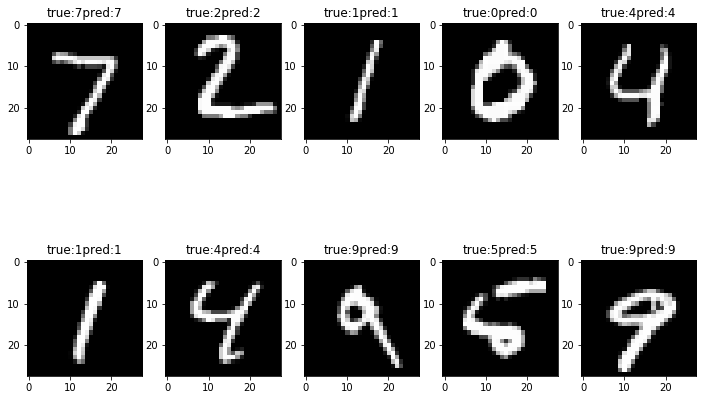

In [30]:
loss, accuracy = model.evaluate(x_valid.reshape(-1, 28, 28, 1), y_valid)
print(loss, accuracy)

result = model.predict(x_valid[:10].reshape(-1, 28, 28, 1))
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_valid[i], cmap='gray')
    plt.title("true:{}pred:{}".format(np.argmax(y_valid[i], axis=0), np.argmax(result[i], axis=0)))
plt.show()